In [35]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Import Scaled Data

In [36]:
# Import scaled earthquake data
df = pd.read_csv('../../Resources/earthquake_data_standardized.csv')
df.head()

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density,mmi_class
0,-0.858789,0.217395,-0.138401,1.259068,-0.162005,-0.621166,0.764993,0.856091,-0.187953,-3.275980,...,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,-0.042471,0.055255,-1.885829,2
1,-1.586411,1.453026,2.957343,0.278647,-0.799719,0.182939,-0.322804,-1.396320,-0.143028,0.718901,...,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,-0.064978,0.059791,0.643055,0
2,-0.451425,1.705352,1.297980,0.866900,-0.368324,2.000126,-0.866703,-0.789901,-0.187953,-1.531736,...,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,-0.074322,0.061360,-0.257281,0
3,-0.891745,0.639950,-0.776489,0.808074,-0.405837,-0.566141,-0.594754,-0.010221,0.620696,0.775167,...,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,-0.058419,0.058169,1.440778,0
4,0.049063,0.917870,-0.567035,0.866900,1.919944,1.537912,-0.594754,-1.396320,1.564120,0.775167,...,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,-0.052158,0.058550,-0.138119,1


## Create X and y

In [37]:
# Create X and y
X = df.drop(columns='mmi_class', axis=1)
y = df['mmi_class']
display(X.head())
display(y[:5])

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density
0,-0.858789,0.217395,-0.138401,1.259068,-0.162005,-0.621166,0.764993,0.856091,-0.187953,-3.275980,...,3.288087,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,-0.042471,0.055255,-1.885829
1,-1.586411,1.453026,2.957343,0.278647,-0.799719,0.182939,-0.322804,-1.396320,-0.143028,0.718901,...,0.813702,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,-0.064978,0.059791,0.643055
2,-0.451425,1.705352,1.297980,0.866900,-0.368324,2.000126,-0.866703,-0.789901,-0.187953,-1.531736,...,-0.542928,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,-0.074322,0.061360,-0.257281
3,-0.891745,0.639950,-0.776489,0.808074,-0.405837,-0.566141,-0.594754,-0.010221,0.620696,0.775167,...,-0.274021,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,-0.058419,0.058169,1.440778
4,0.049063,0.917870,-0.567035,0.866900,1.919944,1.537912,-0.594754,-1.396320,1.564120,0.775167,...,-0.128764,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,-0.052158,0.058550,-0.138119


0    2
1    0
2    0
3    0
4    1
Name: mmi_class, dtype: int64

## K-Nearest-Neighbor Model without Optimization

In [38]:
# Split data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [39]:
# Instantiate and fit a KNN model on train data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on test data
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

# Determine balanced accuracies
print(f'Balanced Accuracy - Train: {balanced_accuracy_score(y_train, y_train_predict):.3f}')
print(f'Balanced Accuracy - Test: {balanced_accuracy_score(y_test, y_test_predict):.3f}')

# Print classification report
print(classification_report(y_test, y_test_predict))

Balanced Accuracy - Train: 0.653
Balanced Accuracy - Test: 0.518
              precision    recall  f1-score   support

           0       0.49      0.63      0.55        79
           1       0.52      0.55      0.54        96
           2       0.65      0.37      0.47        65

    accuracy                           0.53       240
   macro avg       0.55      0.52      0.52       240
weighted avg       0.55      0.53      0.52       240



### Optimize Number of Nearest Neighbors

In [40]:
scores = {'k': range(1, 40, 2),
          'Train Accuracy': [],
          'Test Accuracy': []}

for k in scores['k']:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_predict = knn.predict(X_train)
    test_predict = knn.predict(X_test)

    scores['Train Accuracy'].append(balanced_accuracy_score(y_train, train_predict))
    scores['Test Accuracy'].append(balanced_accuracy_score(y_test, test_predict))

df_knn_scores = pd.DataFrame(scores).set_index('k')

display(df_knn_scores.head())

,Train Accuracy,Test Accuracy
k,,
1,1.000000,0.497083
3,0.713680,0.492274
5,0.652538,0.518075
7,0.602246,0.550661
9,0.591627,0.549429


<Axes: xlabel='k'>

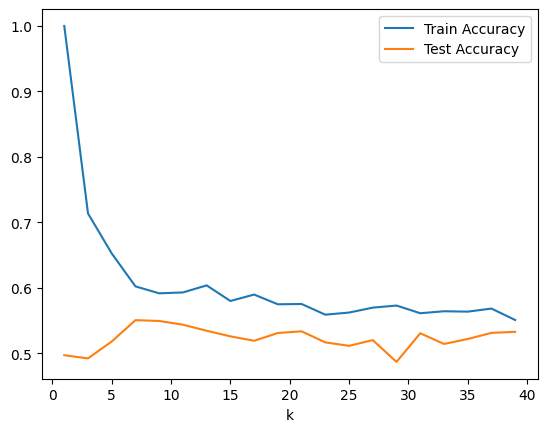

In [41]:
# Plot the scores
df_knn_scores.plot() 

**Concusion:** Just varying the number of nearest neighbors to include does not improve the score.

## Evaluate KNN Model Using Reduced Feature Sets

### Reduce Number of features Using P-Value Analysis

Calculate the p-value of each feature.

In [42]:
# Instantiate and fit a linear regression model for p-value analysis
lr = sm.OLS(y_train, X_train).fit()

# Show the p-values of all columns sorted in ascending order
lr.pvalues.sort_values()

magnitude                4.095516e-14
depth                    9.574987e-06
latitude                 1.125681e-02
soil_density             1.341249e-02
nodal_plane_1_strike     1.829843e-01
percent_double_couple    2.424954e-01
min_station_distance     2.983221e-01
p_axis_azimuth           3.167297e-01
p_axis_plunge            3.263098e-01
n_axis_plunge            3.324541e-01
t_axis_plunge            5.036810e-01
nodal_plane_2_rake       5.631834e-01
scalar_moment            6.023620e-01
t_axis_azimuth           6.360565e-01
n_axis_azimuth           6.441934e-01
nodal_plane_2_dip        6.866619e-01
tensor_mrt               6.896088e-01
t_axis_length            6.917860e-01
nodal_plane_1_dip        6.954739e-01
number_stations          6.974154e-01
tensor_mpp               7.411834e-01
tensor_mtt               7.412266e-01
tensor_mrr               7.412471e-01
n_axis_length            7.728207e-01
nodal_plane_1_rake       7.933559e-01
tensor_mrp               8.046063e-01
tensor_mtp  

Remove each feature one by one by setting the cutoff value for p to the p-value of each feature.

In [43]:
# Create a list of p-value cutoffs that are equal to the p-values of each feature
cutoffs = lr.pvalues[lr.pvalues > min(lr.pvalues)].sort_values(ascending=False).to_list()
# Create a dictionary to store the results of the feature removal
pvalues_optimization = {'Number of Features Removed': range(1, len(cutoffs)+1),
                        'Cutoffs': cutoffs,
                        'Train Accuracy': [],
                        'Test Accuracy': []}

for cutoff in cutoffs:
    # Remove features from train and test data
    X_train_reduced = X_train[lr.pvalues[lr.pvalues < cutoff].keys()]
    X_test_reduced = X_test[lr.pvalues[lr.pvalues < cutoff].keys()]

    # Instantiate and fit a Random Forest Classifier model
    knn = KNeighborsClassifier()
    knn.fit(X_train_reduced, y_train)

    # Make predictions for train and test data
    train_predict = knn.predict(X_train_reduced)
    test_predict = knn.predict(X_test_reduced)

    # Record the accuracy for train and test data
    pvalues_optimization['Train Accuracy'].append(balanced_accuracy_score(y_train, train_predict))
    pvalues_optimization['Test Accuracy'].append(balanced_accuracy_score(y_test, test_predict))

# Create a DataFrame for the results
df_pvalues_optimization = pd.DataFrame(pvalues_optimization).set_index('Number of Features Removed')

display(df_pvalues_optimization)

,Cutoffs,Train Accuracy,Test Accuracy
Number of Features Removed,,,
1,0.997400,0.640440,0.487307
2,0.928712,0.655193,0.446123
3,0.862869,0.655193,0.446123
4,0.828020,0.655193,0.446123
5,0.804606,0.655193,0.440995
6,0.793356,0.649512,0.492275
7,0.772821,0.649512,0.492275
8,0.741247,0.649512,0.492275
9,0.741227,0.649512,0.492275


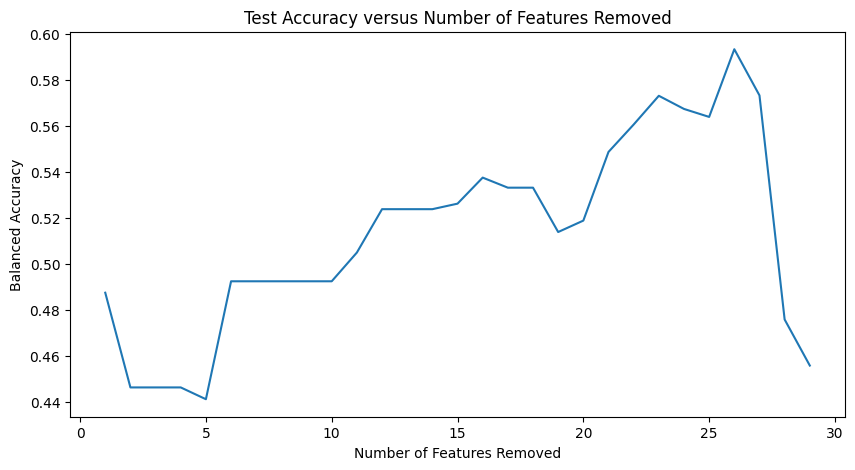

In [44]:
# Plot the Test Accuracy versus the number of features removed
plt.figure(figsize = (10,5))
plt.plot(df_pvalues_optimization.index,
         df_pvalues_optimization['Test Accuracy'])
plt.title('Test Accuracy versus Number of Features Removed')
plt.xlabel('Number of Features Removed')
plt.ylabel('Balanced Accuracy')

plt.show()

In [45]:
# Find the record with the maximim test accuracy
max_test_accuracy = max(df_pvalues_optimization['Test Accuracy'])
max_accuracy_record = df_pvalues_optimization[df_pvalues_optimization['Test Accuracy']==max_test_accuracy]

display(max_accuracy_record)

,Cutoffs,Train Accuracy,Test Accuracy
Number of Features Removed,,,
26,0.182984,0.716299,0.593178


**Conclusion:** Slight improvement in train and test accuracy when we remove 26 features leaving only 4. However, it is still not very close to our target and the test accuracy is worse than that of the Random Forest Classifier model.

### Reduce Number of Features Using PCA

In [46]:
# Optimize the number of principal components to use
# Define a list used to vary the number of principal components to try from 2 to the number of
# features minus 1.
n_principal_components = range(2, len(X.columns))

pca_optimization = {'Components': n_principal_components,
                    'Explained Variance': [],
                    'Train Accuracy': [],
                    'Test Accuracy': []}

# Loop over the number of principal components to try
for n_comps in n_principal_components:
    # Instantiate a PCA model
    pca = PCA(n_components=n_comps, random_state=1)

    # Fit the PCA model to the train data
    pca.fit(X_train)

    # Transform train and test data
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Record the explained variance
    pca_optimization['Explained Variance'].append(pca.explained_variance_ratio_.sum())

    # Instantiate and fit a Random Forest Classifier model with the PCA feature set
    knn_pca = KNeighborsClassifier()
    knn_pca.fit(X_train_pca, y_train)

    # Predict the train data and record the Balanced Accuracy Score
    train_pca_predict = knn_pca.predict(X_train_pca)
    pca_optimization['Train Accuracy'].append(balanced_accuracy_score(y_train, train_pca_predict))

    # Predict the test data and record the Balanced Accuracy Score
    test_pca_predict = knn_pca.predict(X_test_pca)
    pca_optimization['Test Accuracy'].append(balanced_accuracy_score(y_test, test_pca_predict))

# Create a DataFrame
df_pca_optimization = pd.DataFrame(pca_optimization).set_index('Components')

display(df_pca_optimization)

,Explained Variance,Train Accuracy,Test Accuracy
Components,,,
2,0.323097,0.625205,0.466315
3,0.408470,0.615706,0.415460
4,0.479975,0.620340,0.464014
5,0.543808,0.597540,0.438858
6,0.596360,0.591062,0.413057
7,0.646071,0.617511,0.493446
8,0.685777,0.606924,0.469461
9,0.720388,0.611756,0.473842
10,0.752262,0.626195,0.495584


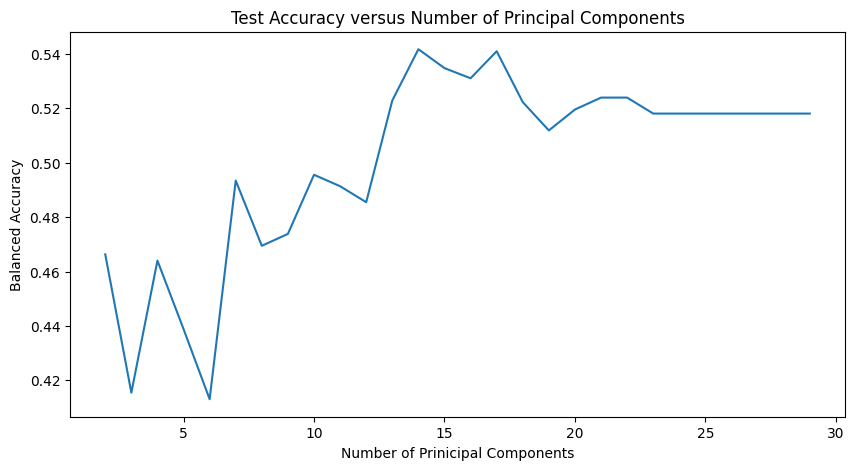

In [47]:
# Plot Accuracy versus number of principal components
plt.figure(figsize = (10,5))
plt.plot(df_pca_optimization.index,
         df_pca_optimization['Test Accuracy'])
plt.title('Test Accuracy versus Number of Principal Components')
plt.xlabel('Number of Prinicipal Components')
plt.ylabel('Balanced Accuracy')

plt.show()

In [48]:
# Find the record with the maximim test accuracy
max_test_accuracy = max(df_pca_optimization['Test Accuracy'])
max_accuracy_record = df_pca_optimization[df_pca_optimization['Test Accuracy']==max_test_accuracy]

display(max_accuracy_record)

,Explained Variance,Train Accuracy,Test Accuracy
Components,,,
14,0.863821,0.637603,0.541737


**Conclusion:** Using the balanced accuracy score as a metric, PCA performs worse in selecting features than using the p-values algorithm. In fact, the are hardly improved compared to the base KNN model.

## Using Hyperparameter Tuning to Improve Performance 

We will vary the following hyperparameters.
* n_neighbors,
* weights,
* leaf_size.

Use a randomized search estimator to explore the hyperparameter space.

In [49]:
# Define a hyperparameter grid
param_grid = {
    'n_neighbors': range(1,20,2),
    'weights': ['uniform', 'distance'],
    'leaf_size': range(1, 500)
}

# Instantiate a KNN model
knn = KNeighborsClassifier()

In [50]:
# Instantiate the Randomized Search Estimator
random_knn = RandomizedSearchCV(knn, param_grid, random_state=0, verbose=3)

# Fit the Randomized Search Estimator on train data
random_knn.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END leaf_size=137, n_neighbors=13, weights=uniform;, score=0.583 total time=   0.0s
[CV 2/5] END leaf_size=137, n_neighbors=13, weights=uniform;, score=0.521 total time=   0.0s
[CV 3/5] END leaf_size=137, n_neighbors=13, weights=uniform;, score=0.566 total time=   0.0s
[CV 4/5] END leaf_size=137, n_neighbors=13, weights=uniform;, score=0.497 total time=   0.0s
[CV 5/5] END leaf_size=137, n_neighbors=13, weights=uniform;, score=0.434 total time=   0.0s
[CV 1/5] END leaf_size=493, n_neighbors=5, weights=distance;, score=0.514 total time=   0.0s
[CV 2/5] END leaf_size=493, n_neighbors=5, weights=distance;, score=0.493 total time=   0.0s
[CV 3/5] END leaf_size=493, n_neighbors=5, weights=distance;, score=0.510 total time=   0.0s
[CV 4/5] END leaf_size=493, n_neighbors=5, weights=distance;, score=0.503 total time=   0.0s
[CV 5/5] END leaf_size=493, n_neighbors=5, weights=distance;, score=0.434 total time=   0.0s
[CV 1/5] 

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': range(1, 500),
                                        'n_neighbors': range(1, 20, 2),
                                        'weights': ['uniform', 'distance']},
                   random_state=0, verbose=3)

In [51]:
# Print best hyperparameters
print(random_knn.best_params_)

{'weights': 'distance', 'n_neighbors': 19, 'leaf_size': 243}


In [52]:
# Make predictions with the hypertuned model
random_knn_train_predict = random_knn.predict(X_train)
random_knn_test_predict = random_knn.predict(X_test)

# Calculate and print the balanced accuracies
print(f"Accuracy - Train: {balanced_accuracy_score(y_train, random_knn_train_predict):.3f}")
print(f"Accuracy - Test: {balanced_accuracy_score(y_test, random_knn_test_predict):.3f}")

# Calculate the classification report
print(classification_report(y_test, random_knn_test_predict))

Accuracy - Train: 1.000
Accuracy - Test: 0.543
              precision    recall  f1-score   support

           0       0.51      0.57      0.54        79
           1       0.55      0.61      0.58        96
           2       0.66      0.45      0.53        65

    accuracy                           0.55       240
   macro avg       0.57      0.54      0.55       240
weighted avg       0.57      0.55      0.55       240



**Conclusion:** We are overfitting without an improvement in the test accuracy as compared to the base KNN model.

Let's explore the hyperparameter space around the optimal parameters obtained from the randomized hyperparameter optimization.

In [53]:
# Define a new hyperparameter grid around the best hyperparameters from before
param_grid = {'n_neighbors': range(15, 24),
              'weights': ['distance'],
              'leaf_size': range(225, 265)}

# Instantiate a Random Forest Classifier model
knn2 = KNeighborsClassifier()

In [54]:
# Use a grid search this time.random_rfc2.random_rfc2
# Instantiate the Grid Search Estimator
grid_knn2 = GridSearchCV(knn2, param_grid, verbose=3)

# Fit the Randomized Search Estimator on train data
grid_knn2.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END leaf_size=225, n_neighbors=15, weights=distance;, score=0.576 total time=   0.0s
[CV 2/5] END leaf_size=225, n_neighbors=15, weights=distance;, score=0.556 total time=   0.0s
[CV 3/5] END leaf_size=225, n_neighbors=15, weights=distance;, score=0.545 total time=   0.0s
[CV 4/5] END leaf_size=225, n_neighbors=15, weights=distance;, score=0.524 total time=   0.0s
[CV 5/5] END leaf_size=225, n_neighbors=15, weights=distance;, score=0.476 total time=   0.1s
[CV 1/5] END leaf_size=225, n_neighbors=16, weights=distance;, score=0.569 total time=   0.0s
[CV 2/5] END leaf_size=225, n_neighbors=16, weights=distance;, score=0.549 total time=   0.0s
[CV 3/5] END leaf_size=225, n_neighbors=16, weights=distance;, score=0.559 total time=   0.0s
[CV 4/5] END leaf_size=225, n_neighbors=16, weights=distance;, score=0.517 total time=   0.0s
[CV 5/5] END leaf_size=225, n_neighbors=16, weights=distance;, score=0.455 total time=   0

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': range(225, 265),
                         'n_neighbors': range(15, 24),
                         'weights': ['distance']},
             verbose=3)

In [55]:
# Print best hyperparameters
print(grid_knn2.best_params_)

{'leaf_size': 225, 'n_neighbors': 22, 'weights': 'distance'}


In [56]:
# Make predictions with the hypertuned model
grid_knn2_train_predict = grid_knn2.predict(X_train)
grid_knn2_test_predict = grid_knn2.predict(X_test)

# Calculate and print the balanced accuracies
print(f"Accuracy - Train: {balanced_accuracy_score(y_train, grid_knn2_train_predict):.3f}")
print(f"Accuracy - Test: {balanced_accuracy_score(y_test, grid_knn2_test_predict):.3f}")

# Calculate the classification report
print(classification_report(y_test, grid_knn2_test_predict))

Accuracy - Train: 1.000
Accuracy - Test: 0.551
              precision    recall  f1-score   support

           0       0.53      0.61      0.57        79
           1       0.55      0.61      0.58        96
           2       0.67      0.43      0.52        65

    accuracy                           0.56       240
   macro avg       0.58      0.55      0.56       240
weighted avg       0.57      0.56      0.56       240



**Conclusion:** The KNN model performs consistently worse than the Random Forest Classifier model. Therefore, we will not continue to use it.